In [1]:
import tensorflow as tf
from keras.layers import Dense, Conv2D, GlobalAveragePooling2D
from tfkan.layers import DenseKAN, Conv2DKAN

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load fashion-mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# normalize data
x_train = np.expand_dims(x_train / 255.0, axis=-1).astype(np.float32)
x_test = np.expand_dims(x_test / 255.0, axis=-1).astype(np.float32)

In [30]:
# MLP
mlp = tf.keras.models.Sequential([
    Conv2D(filters=32, kernel_size=5, strides=2, padding='valid', activation='relu'),
    Conv2D(filters=64, kernel_size=5, strides=2, padding='valid', activation='relu'),
    GlobalAveragePooling2D(),
    Dense(10, activation='softmax')
])
mlp.build(input_shape=(None, 28, 28, 1))
mlp.summary()

Model: "sequential_15"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 12, 12, 32)        832       
                                                                 
 conv2d_30 (Conv2D)          (None, 4, 4, 64)          51264     
                                                                 
 global_average_pooling2d_1  (None, 64)                0         
 5 (GlobalAveragePooling2D)                                      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 52746 (206.04 KB)
Trainable params: 52746 (206.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
%%time
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_history = mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.9510 - accuracy: 0.6622 - val_loss: 0.7260 - val_accuracy: 0.7427
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6555 - accuracy: 0.7631 - val_loss: 0.6349 - val_accuracy: 0.7747
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5740 - accuracy: 0.7958 - val_loss: 0.5872 - val_accuracy: 0.7891
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5275 - accuracy: 0.8123 - val_loss: 0.5291 - val_accuracy: 0.8146
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4894 - accuracy: 0.8260 - val_loss: 0.4953 - val_accuracy: 0.8274
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4635 - accuracy: 0.8352 - val_loss: 0.5027 - val_accuracy: 0.8216
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4420 - accuracy: 0.8434 - val_loss: 0.4606 - val_accuracy: 0.8383
Epoch 

In [32]:
# KAN
kan = tf.keras.models.Sequential([
    Conv2DKAN(filters=8, kernel_size=5, strides=2, padding='valid', kan_kwargs={'grid_size': 3}),
    tf.keras.layers.LayerNormalization(),
    Conv2DKAN(filters=16, kernel_size=5, strides=2, padding='valid', kan_kwargs={'grid_size': 3}),
    GlobalAveragePooling2D(),
    DenseKAN(10, grid_size=3),
    tf.keras.layers.Softmax()
])
kan.build(input_shape=(None, 28, 28, 1))
kan.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2dkan_2 (Conv2DKAN)     (None, 12, 12, 8)         1408      
                                                                 
 layer_normalization_1 (Lay  (None, 12, 12, 8)         16        
 erNormalization)                                                
                                                                 
 conv2dkan_3 (Conv2DKAN)     (None, 4, 4, 16)          22416     
                                                                 
 global_average_pooling2d_1  (None, 16)                0         
 6 (GlobalAveragePooling2D)                                      
                                                                 
 dense_kan_1 (DenseKAN)      (None, 10)                1120      
                                                                 
 softmax_1 (Softmax)         (None, 10)              

In [33]:
%%time
kan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
kan_history = kan.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 [==============================] - 62s 129ms/step - loss: 1.0748 - accuracy: 0.6288 - val_loss: 0.7353 - val_accuracy: 0.7373
Epoch 2/10
469/469 [==============================] - 60s 128ms/step - loss: 0.6274 - accuracy: 0.7728 - val_loss: 0.6004 - val_accuracy: 0.7804
Epoch 3/10
469/469 [==============================] - 58s 124ms/step - loss: 0.5507 - accuracy: 0.7985 - val_loss: 0.5515 - val_accuracy: 0.7996
Epoch 4/10
469/469 [==============================] - 61s 130ms/step - loss: 0.5108 - accuracy: 0.8153 - val_loss: 0.5282 - val_accuracy: 0.8090
Epoch 5/10
469/469 [==============================] - 61s 130ms/step - loss: 0.4845 - accuracy: 0.8248 - val_loss: 0.4977 - val_accuracy: 0.8213
Epoch 6/10
469/469 [==============================] - 60s 129ms/step - loss: 0.4661 - accuracy: 0.8309 - val_loss: 0.4966 - val_accuracy: 0.8244
Epoch 7/10
469/469 [==============================] - 60s 129ms/step - loss: 0.4489 - accuracy: 0.8369 - val_loss: 0.4825 - val_ac

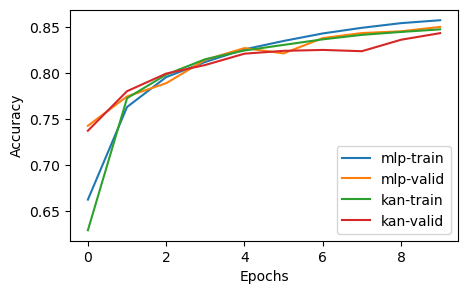

In [35]:
# plot history
fig = plt.figure(figsize=(5,3))
plt.plot(mlp_history.history['accuracy'], label='mlp-train')
plt.plot(mlp_history.history['val_accuracy'], label='mlp-valid')
plt.plot(kan_history.history['accuracy'], label='kan-train')
plt.plot(kan_history.history['val_accuracy'], label='kan-valid')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()